# Support Vector Machines

**Support Vector Machine** is powerful and widely used.<br>
- Can be considered as an extension of **perceptron**.
- **Perceptron** algorithm minimises misclassification error.
- In **SVM** optimization objective is to maximize the the **margin**
- **Margin** can be defined as the distance between the sperating **hyperplane** (decision boundary) and 
  training samples that ae closet to the **hyperplane**
- These training samples are called **support-vectors**.


### Why maximize the margin?
The reason behnid having decision boundaries  with large margins tend to have lower **Generalization Error**.<br>
Decision Boundaries with **small margins** are more prone to **overfitting** 

### Introduction Of slack Variable.
**Slack Variable 𝝃** lead to the **soft margin classification**
Motivation For introducing **Slack Variable**
-  Relax the linear constraints for **non-linearly** seperable data.
-  Allow for algorithm **Convergence** in the presence of **Misclassification**. 


### Training a SVC model with scikit-learn
-  Use Iris data set in scikit-learn
-  Use features «petal length» and «petal width»
-  Use train_test_split with test_size=0.4 and random_state=5 
-  Train a SVC with C=1.0 and random_state=77
-  Plot decision regions using mlxtend package

In [23]:
# Imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [5]:
iris = datasets.load_iris()
# Spliting the data into X and y. for X we use petal lenght and petal Width.
X = iris.data[:,[2,3]]
y = iris.target

In [7]:
# Split the data into training and Test set.40% data for test and 60% for training.
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.4, random_state=75)




In [12]:
# Scale features using StandardScaler class in scikit-learn
sc = StandardScaler()
sc.fit(X_train)
# Transform (standardise) both X_train and X_test with mean and STD from training data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
# Train the model from Sklearn.
# C : float, optional (default=1.0)
#Penalty parameter C of the error term
svm = SVC(kernel='linear', C=1, random_state=3)
svm.fit(X_train_std, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=3,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
#Prediction 
y_pred = svm.predict(X_test_std)

array([1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0,
       2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0])

In [17]:
#Print out the accuracy 
print('Test Accuracy:' ,svm.score(X_test_std,y_test))

Test Accuracy: 0.9166666666666666


In [18]:
print("Misclassified samples: " , (y_test != y_pred).sum())

Misclassified samples:  5


In [21]:
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.92


## Plot the decision Regions Using MLXTEND package

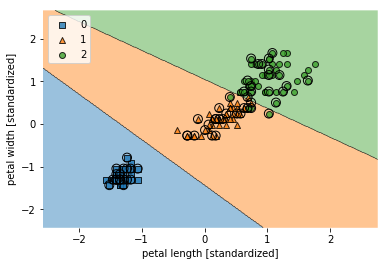

In [25]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,clf=svm,X_highlight=X_test_std)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
#plt.tight_layout()